# Assignment 2 - part 1

## Feed forward network (multilayer perceptron)

In this assignment you shall develop the complete training and evaluation pipeline for a fully connected feed forward network.
This shall cover all the stages discussed in the course, starting from data preparation and finishing with model evaluation.
You can (you should) use the full functionality of PyTorch and all its packages.

You can write most of your code as standard python scripts and packages outside jupyter notebook.
The calls to the functionality shall, however, be executed from this notebook (not command-line).
All printouts images and comments should be displayed in this notebook.

You shall use this framework to train (at least) 3 feed-forward neural networks and compare their performance:
- first, use only linear layers and non-linearites of your choice. You shall decide on the depth and width of the layers as well as all other hyperparameters as you see fit.
- second, use linear layers, non-linearities and drop-out
- third, use linear layers, non-linearities,  drop-out and batch norm


### Model training and evaluation

Define the function `mlp_train` for training and evaluating an MLP model for classification of **FashionMNIST** data.
The function shall be flexible so that it can take in all necessary hyper-parameters for the training. You shall not fix the hyper-parameters in the code of the function itself as fixed values.

The `mlp_train` function shall return 
* the trained model `mlp_model`
* anything else you deem important or useful for monitoring purposes etc. 

In [2]:
%pip install torchvision

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# DATA Loading
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define the transformation for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the FashionMNIST dataset
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [4]:
#Model Definition
class BasicMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(BasicMLP, self).__init__()
        layers = []
        current_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(current_size, hidden_size))
            layers.append(nn.ReLU())
            current_size = hidden_size
        layers.append(nn.Linear(current_size, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class DropoutMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate):
        super(DropoutMLP, self).__init__()
        layers = []
        current_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(current_size, hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            current_size = hidden_size
        layers.append(nn.Linear(current_size, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

class BatchNormMLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate):
        super(BatchNormMLP, self).__init__()
        layers = []
        current_size = input_size
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(current_size, hidden_size))
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_rate))
            current_size = hidden_size
        layers.append(nn.Linear(current_size, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


In [5]:
# define function mlp_train so that it can be run from this cell
from cnn_code.helpers import mlp_train

# Training and Evaluating Models
input_size = 28 * 28
hidden_sizes = [256, 128, 64]
output_size = 10
num_epochs = 20
learning_rate = 0.001

# 1. Basic MLP
basic_model = BasicMLP(input_size, hidden_sizes, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(basic_model.parameters(), lr=learning_rate)
basic_model, basic_train_losses, basic_test_losse  = mlp_train(basic_model, train_loader, test_loader, criterion, optimizer, num_epochs)


# 2. Dropout MLP
dropout_rate = 0.5
dropout_model = DropoutMLP(input_size, hidden_sizes, output_size, dropout_rate)
optimizer = optim.Adam(dropout_model.parameters(), lr=learning_rate)
dropout_model, dropout_train_losses, dropout_test_losses = mlp_train(dropout_model, train_loader, test_loader, criterion, optimizer, num_epochs)


# 3. BatchNorm + Dropout MLP
batchnorm_model = BatchNormMLP(input_size, hidden_sizes, output_size, dropout_rate)
optimizer = optim.Adam(batchnorm_model.parameters(), lr=learning_rate)
batchnorm_model, batchnorm_train_losses, batchnorm_test_losses, batchnorm_accuracies = mlp_train(batchnorm_model, train_loader, test_loader, criterion, optimizer, num_epochs)


Epoch [1/20], Loss: 0.5178, Test Loss: 0.4513, Accuracy: 83.47%
Epoch [2/20], Loss: 0.3753, Test Loss: 0.3972, Accuracy: 85.63%
Epoch [3/20], Loss: 0.3359, Test Loss: 0.3764, Accuracy: 86.12%
Epoch [4/20], Loss: 0.3143, Test Loss: 0.3673, Accuracy: 86.95%
Epoch [5/20], Loss: 0.2918, Test Loss: 0.3593, Accuracy: 87.49%
Epoch [6/20], Loss: 0.2767, Test Loss: 0.3577, Accuracy: 87.40%
Epoch [7/20], Loss: 0.2635, Test Loss: 0.3579, Accuracy: 87.53%
Epoch [8/20], Loss: 0.2531, Test Loss: 0.3390, Accuracy: 87.66%
Epoch [9/20], Loss: 0.2404, Test Loss: 0.3411, Accuracy: 87.82%
Epoch [10/20], Loss: 0.2308, Test Loss: 0.3456, Accuracy: 88.22%
Epoch [11/20], Loss: 0.2202, Test Loss: 0.3506, Accuracy: 88.53%
Epoch [12/20], Loss: 0.2117, Test Loss: 0.3559, Accuracy: 88.18%
Epoch [13/20], Loss: 0.2025, Test Loss: 0.3550, Accuracy: 88.75%
Epoch [14/20], Loss: 0.1946, Test Loss: 0.3514, Accuracy: 88.39%
Epoch [15/20], Loss: 0.1877, Test Loss: 0.3710, Accuracy: 88.27%
Epoch [16/20], Loss: 0.1769, Test 

### Model application

Define a simple utility function `mlp_apply` that uses the train model to classify 10 examples of the test set and displays the 10 images in a grid together with their true and predicted labels.

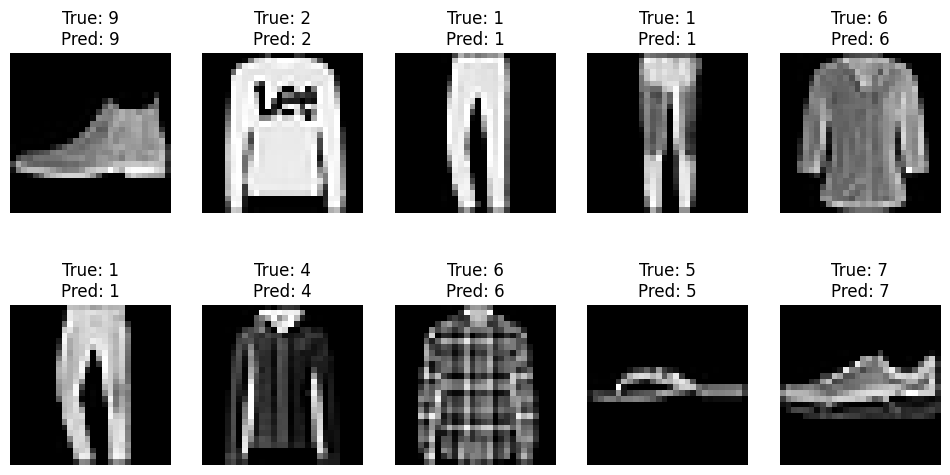

In [6]:
# define function mlp_train so that it can be run from this cel
from cnn_code.helpers import mlp_apply

# user parameters
test_indexes = [0,1,2,3,4,5,6,7,8,9]  # list of 10 indexes - examples to extract from test set
mlp_apply(basic_model, test_loader, test_indexes)
# mlp_apply(mlp_model, test_indexes)

### All experiments for getting high accuracy

In [7]:
# 1) we will try to do hyperparamter tuning using randomizedsearchcv
from sklearn.base import BaseEstimator, ClassifierMixin

class PyTorchMLP(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size=28*28, hidden_sizes=[512, 256, 128], output_size=10, dropout_rate=0.5, learning_rate=0.001, num_epochs=30):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.model = None
        
    def _build_model(self):
        self.model = BatchNormMLP(self.input_size, self.hidden_sizes, self.output_size, self.dropout_rate)
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
    
    def fit(self, X, y):
        train_dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long))
        train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
        
        self._build_model()
        self.model, _, _, _ = mlp_train(self.model, train_loader, train_loader, self.criterion, self.optimizer, self.num_epochs)
        
        return self
    
    def predict(self, X):
        self.model.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.model(X_tensor)
        _, predicted = torch.max(outputs, 1)
        return predicted.numpy()
    
    def predict_proba(self, X):
        self.model.eval()
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.model(X_tensor)
        return torch.softmax(outputs, dim=1).detach().numpy()

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)



In [8]:
param_grid = {
    'hidden_sizes': [[512, 256, 128], [1024, 512, 256], [256, 128, 64]],
    'dropout_rate': [0.3, 0.5, 0.7],
    'learning_rate': [0.01, 0.001, 0.0001],
    'num_epochs': [20, 30, 40]
}

In [9]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Load and prepare the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

X_train = train_dataset.data.numpy().reshape(-1, 28*28)
y_train = train_dataset.targets.numpy()
X_test = test_dataset.data.numpy().reshape(-1, 28*28)
y_test = test_dataset.targets.numpy()

# Instantiate the model
pytorch_mlp = PyTorchMLP()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(pytorch_mlp, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best model
best_model = random_search.best_estimator_
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation accuracy: ", random_search.best_score_)

# Evaluate on the test set
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy: ", test_accuracy)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_21728\1289848975.py", line 24, in fit
ValueError: not enough values to unpack (expected 4, got 3)


### Train and apply model

Use your functions defined above to train the three models. Try different values of the hyper-paramter settings. You shall achieve at least 80% test accuracy with all your models and at least 90% test accuracy with the best one.

Describe briefly your three models and your hyper-parameter setups and comment your results.

**Compare the performance of the three models using suitable supportive tables and graphs, and complemented by relevant comments.**

In [10]:
# define function mlp_train so that it can be run from this cell
from cnn_code.helpers import mlp_train

# Training and Evaluating Models
input_size = 28 * 28
hidden_sizes = [512,256, 128]
output_size = 10
num_epochs = 30
learning_rate = 0.001
dropout_rate = 0.5

# 1. Basic MLP
basic_model = BasicMLP(input_size, hidden_sizes, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(basic_model.parameters(), lr=learning_rate)
basic_model, basic_train_losses, basic_test_losse  = mlp_train(basic_model, train_loader, test_loader, criterion, optimizer, num_epochs)


# 2. Dropout MLP
dropout_model = DropoutMLP(input_size, hidden_sizes, output_size, dropout_rate)
optimizer = optim.Adam(dropout_model.parameters(), lr=learning_rate)
dropout_model, dropout_train_losses, dropout_test_losses = mlp_train(dropout_model, train_loader, test_loader, criterion, optimizer, num_epochs)


# 3. BatchNorm + Dropout MLP
batchnorm_model = BatchNormMLP(input_size, hidden_sizes, output_size, dropout_rate)
optimizer = optim.Adam(batchnorm_model.parameters(), lr=learning_rate)
batchnorm_model, batchnorm_train_losses, batchnorm_test_losses= mlp_train(batchnorm_model, train_loader, test_loader, criterion, optimizer, num_epochs)


Epoch [1/30], Loss: 0.5021, Test Loss: 0.4339, Accuracy: 83.88%
Epoch [2/30], Loss: 0.3706, Test Loss: 0.3865, Accuracy: 85.94%
Epoch [3/30], Loss: 0.3346, Test Loss: 0.3704, Accuracy: 86.58%
Epoch [4/30], Loss: 0.3091, Test Loss: 0.3473, Accuracy: 87.46%
Epoch [5/30], Loss: 0.2884, Test Loss: 0.3568, Accuracy: 87.51%
Epoch [6/30], Loss: 0.2715, Test Loss: 0.3386, Accuracy: 88.28%
Epoch [7/30], Loss: 0.2545, Test Loss: 0.3427, Accuracy: 87.93%
Epoch [8/30], Loss: 0.2431, Test Loss: 0.3541, Accuracy: 87.96%
Epoch [9/30], Loss: 0.2318, Test Loss: 0.3387, Accuracy: 88.61%
Epoch [10/30], Loss: 0.2175, Test Loss: 0.3542, Accuracy: 87.98%
Epoch [11/30], Loss: 0.2079, Test Loss: 0.3457, Accuracy: 88.57%
Epoch [12/30], Loss: 0.2006, Test Loss: 0.3697, Accuracy: 88.30%
Epoch [13/30], Loss: 0.1876, Test Loss: 0.3613, Accuracy: 88.27%
Epoch [14/30], Loss: 0.1808, Test Loss: 0.3581, Accuracy: 88.85%
Epoch [15/30], Loss: 0.1732, Test Loss: 0.3636, Accuracy: 88.99%
Epoch [16/30], Loss: 0.1638, Test 

ValueError: not enough values to unpack (expected 4, got 3)